# TOC



# Import Neograph package

In [61]:
%load_ext autoreload
%autoreload 2
import neograph as ng

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create a NeoGraph and Connect to DBMS

In [62]:
uri      = "bolt://localhost:7687" # in Neo4j Desktop
                              # custom URL for Sandbox or Aura
user     = "neo4j"            # your user name 
                              # default is always "neo4j" 
                              # unless you have changed it. 
password = 'usaa&ibm'   #your neo4j password

G = ng.NeoGraph(uri = uri, user = user, password = password)

# TESTING

## Contraints on DBMS (WORKING)

In [63]:
G.create_constraint(label = 'Person', prop = 'name', on='node', constraint_type = 'unique')
G.get_constraints()

Desired constraint on nodes for Person{name} already exists.

Get constraint query result:
[{'id': 4, 'name': 'Person_node_name_unique', 'type': 'UNIQUENESS', 'entityType': 'NODE', 'labelsOrTypes': ['Person'], 'properties': ['name'], 'ownedIndexId': 3}]


## Storage in DBMS (WORKING)

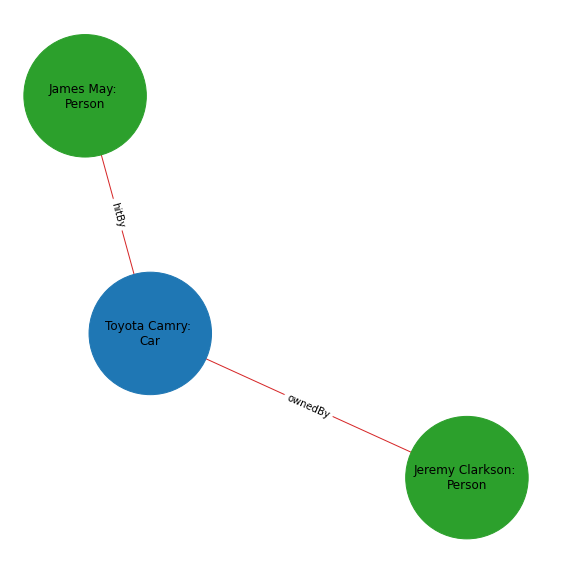


Add node query result:
[{'n': {'favorite_food': 'pizza', 'color': 'green', 'created': 1665003536815, 'name': 'James May'}, 'n.created': 1665003536815}]

Add node query result:
[{'n': {'favorite_food': 'Richard Hammond', 'color': 'green', 'created': 1665003536833, 'name': 'Jeremy Clarkson'}, 'n.created': 1665003536833}]

Add node query result:
[{'n': {'condition': 'Like new', 'color': 'blue', 'created': 1665003536836, 'name': 'Toyota Camry'}, 'n.created': 1665003536836}]

Add relationship query result:
[{'e': ({}, 'hitBy', {})}]

Add relationship query result:
[{'e': ({}, 'ownedBy', {})}]


In [64]:
G.add_node('James May', data = {'color': 'green', 'label': 'Person', 'favorite_food':'pizza'})
G.add_node('Jeremy Clarkson', data = {'color' : 'green', 'label': 'Person', 'favorite_food':'Richard Hammond'})
G.add_node('Toyota Camry', data = {'color': 'blue', 'label': 'Car', 'condition':'Like new'})
G.add_edge('James May', 'Toyota Camry', label = 'hitBy')
G.add_edge('Toyota Camry', 'Jeremy Clarkson', label = 'ownedBy')

ng.draw_labeled_net(G)

G.store_in_neo()

## Loading (NOT FINISHED, need to extract into networkx graph)

In [65]:
G.load_from_neo()

[{'n': {'favorite_food': 'pizza', 'color': 'green', 'created': 1665003536815, 'name': 'James May'}}, {'n': {'favorite_food': 'Richard Hammond', 'color': 'green', 'created': 1665003536833, 'name': 'Jeremy Clarkson'}}, {'n': {'condition': 'Like new', 'color': 'blue', 'created': 1665003536836, 'name': 'Toyota Camry'}}]


[{'n': {'favorite_food': 'pizza',
   'color': 'green',
   'created': 1665003536815,
   'name': 'James May'}},
 {'n': {'favorite_food': 'Richard Hammond',
   'color': 'green',
   'created': 1665003536833,
   'name': 'Jeremy Clarkson'}},
 {'n': {'condition': 'Like new',
   'color': 'blue',
   'created': 1665003536836,
   'name': 'Toyota Camry'}}]

## Reading (WORKING)

In [66]:
G.read_from_neo()

[{'n': {'favorite_food': 'pizza', 'color': 'green', 'created': 1665003536815, 'name': 'James May'}}, {'n': {'favorite_food': 'Richard Hammond', 'color': 'green', 'created': 1665003536833, 'name': 'Jeremy Clarkson'}}, {'n': {'condition': 'Like new', 'color': 'blue', 'created': 1665003536836, 'name': 'Toyota Camry'}}]


[{'n': {'favorite_food': 'pizza',
   'color': 'green',
   'created': 1665003536815,
   'name': 'James May'}},
 {'n': {'favorite_food': 'Richard Hammond',
   'color': 'green',
   'created': 1665003536833,
   'name': 'Jeremy Clarkson'}},
 {'n': {'condition': 'Like new',
   'color': 'blue',
   'created': 1665003536836,
   'name': 'Toyota Camry'}}]

## Driver Open/Close (NOT WORKING AS INTENDED)

In [48]:
G.close()

In [49]:
G.add_node('Honda Accord', data = {'color': 'blue', 'label': 'Car', 'condition':'Like new'})
G.store_in_neo()


Add node query result:
[{'n': {'favorite_food': 'pizza', 'color': 'green', 'created': 1665002695068, 'name': 'James May'}, 'n.created': 1665002695068}]

Add node query result:
[{'n': {'favorite_food': 'Richard Hammond', 'color': 'green', 'created': 1665002695128, 'name': 'Jeremy Clarkson'}, 'n.created': 1665002695128}]

Add node query result:
[{'n': {'condition': 'Like new', 'color': 'blue', 'created': 1665002695162, 'name': 'Toyota Camry'}, 'n.created': 1665002695162}]

Add node query result:
[{'n': {'condition': 'Like new', 'color': 'blue', 'created': 1665002893047, 'name': 'Honda Accord'}, 'n.created': 1665002893047}]

Add relationship query result:
[{'e': ({}, 'hitBy', {})}]

Add relationship query result:
[{'e': ({}, 'ownedBy', {})}]


## UNIT TESTING: 

### nx_to_neo.sanitize (WORKING)

In [51]:
from neograph import nx_to_neo

#check that sanitizing function is working as expected

str1 = 'h ll;/2en'
str2 = '  80; like /'
str1, str2 = nx_to_neo.sanitize(str1, str2)
print(str1)
print(str2)

h ll2en
  80 like 
